In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_dataset():
    """This function loads the data set"""
    df = pd.read_csv('googleplaystore.csv')
    return df
dataset = load_dataset()
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
def print_summarize_dataset(data_set):
    """This function prints out the dimension, first 10 rows, and the statistical summary of the boston housing prices data"""
    
    # print the data dimension
    print("Dataset dimension:")
    print(dataset.shape)
    print()
   
    # print the first 10 rows
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print()

    # print the summary statistics
    print("Statistical summary:")
    print(dataset.describe())

# Assuming you have a dataset named 'dataset' containing the boston housing prices data
print_summarize_dataset(dataset)


Dataset dimension:
(10841, 13)

First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0 

In [4]:
def data_info(dataset):
    """this function prints the information on the data set"""
    
    # checking for  number of duplicates in the dataset
    print("Total number of duplicates found:")
    print(dataset.duplicated().sum())
    print()
    
    # printing the datas information (bull values & data types)
    print("Dataset information:")
    dataset.info()
data_info(dataset)

Total number of duplicates found:
483

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
def clean_dataset(data_set):
    """This function cleans up the data set by changing the data types, dropping null value and removing duplicates, and split some columns"""
    # Dropping null values
    data_set.dropna(inplace=True)
    
    # Dropping duplicates
    data_set.drop_duplicates(inplace=True)
    
    # Changing the 'Last Updated' column to datetime format
    data_set['Last Updated'] = pd.to_datetime(data_set['Last Updated'])
    
    # Cleaning the 'Installs' column
    data_set['Installs'] = data_set['Installs'].str.replace(',', '').str.replace('+', '')
    data_set['Installs'] = pd.to_numeric(data_set['Installs'], errors='coerce')
    
    # Cleaning the 'Price' column
    data_set['Price'] = data_set['Price'].str.replace('$', '')
    data_set['Price'] = pd.to_numeric(data_set['Price'], errors='coerce')
    
    # Changing the Reviews, Installs, and Price columns to int
    data_set[['Reviews', 'Installs', 'Price']] = data_set[['Reviews', 'Installs', 'Price']].astype(int) 
    
    # Split the genre column to get the first listed genre
    data_set['Genres'] = data_set['Genres'].apply(lambda x: re.split(r'[^\w\s]', x)[0])
    
    
clean_dataset(dataset)

In [6]:
# checking for clean data
data_info(dataset)

Total number of duplicates found:
0

Dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   int32         
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   int32         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   int32         
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(3), objec

In [7]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art,2018-06-20,1.1,4.4 and up


# Analysis

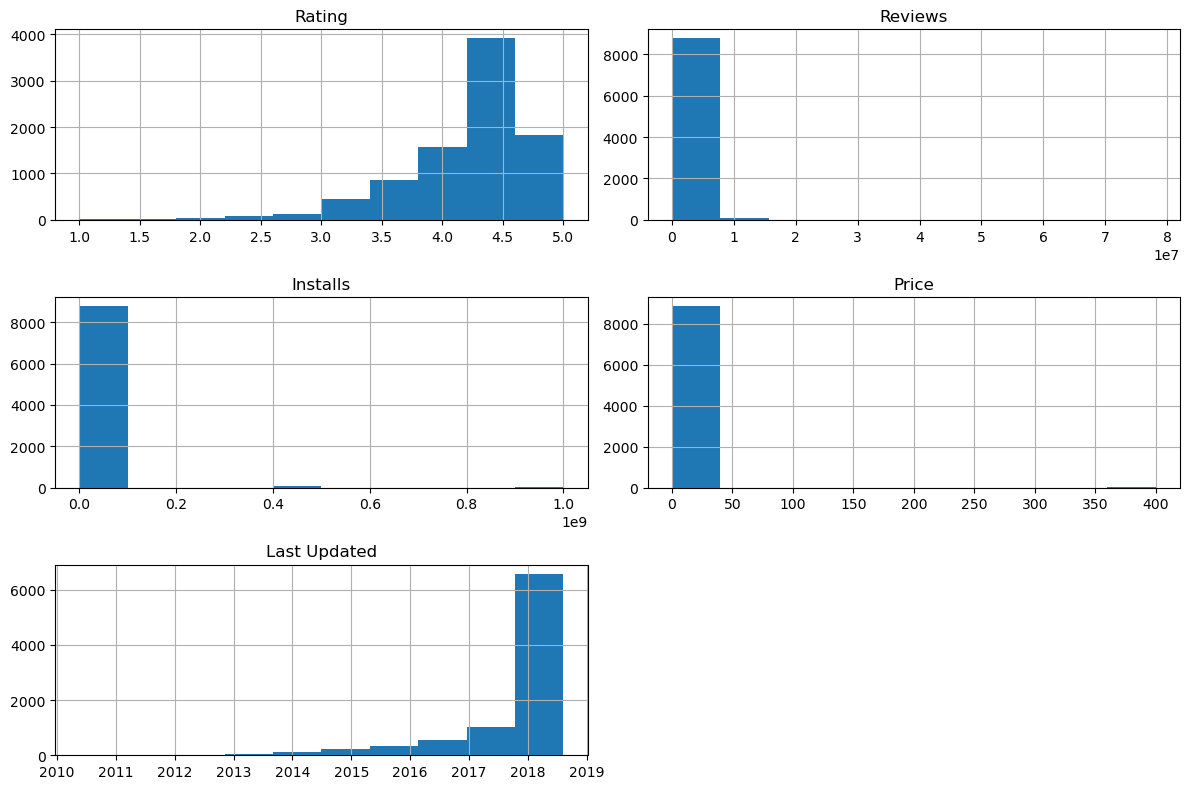

In [8]:
def print_histograms(data_set):
    """This function print the histogram distribution of each variable in the dataset"""
    dataset.hist(figsize=(12, 8))
    plt.tight_layout()
    
print_histograms(dataset) 

In [9]:
def compute_correlations_matrix(data):
    # Filter out non-numerical columns (e.g., datetime columns)
    numerical_data = data.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(numerical_data, rowvar=False)
    
    return correlation_matrix
compute_correlations_matrix(dataset)    

array([[ 1.        ,  0.06872388,  0.05086907, -0.02297236],
       [ 0.06872388,  1.        ,  0.63342157, -0.00898969],
       [ 0.05086907,  0.63342157,  1.        , -0.01064313],
       [-0.02297236, -0.00898969, -0.01064313,  1.        ]])

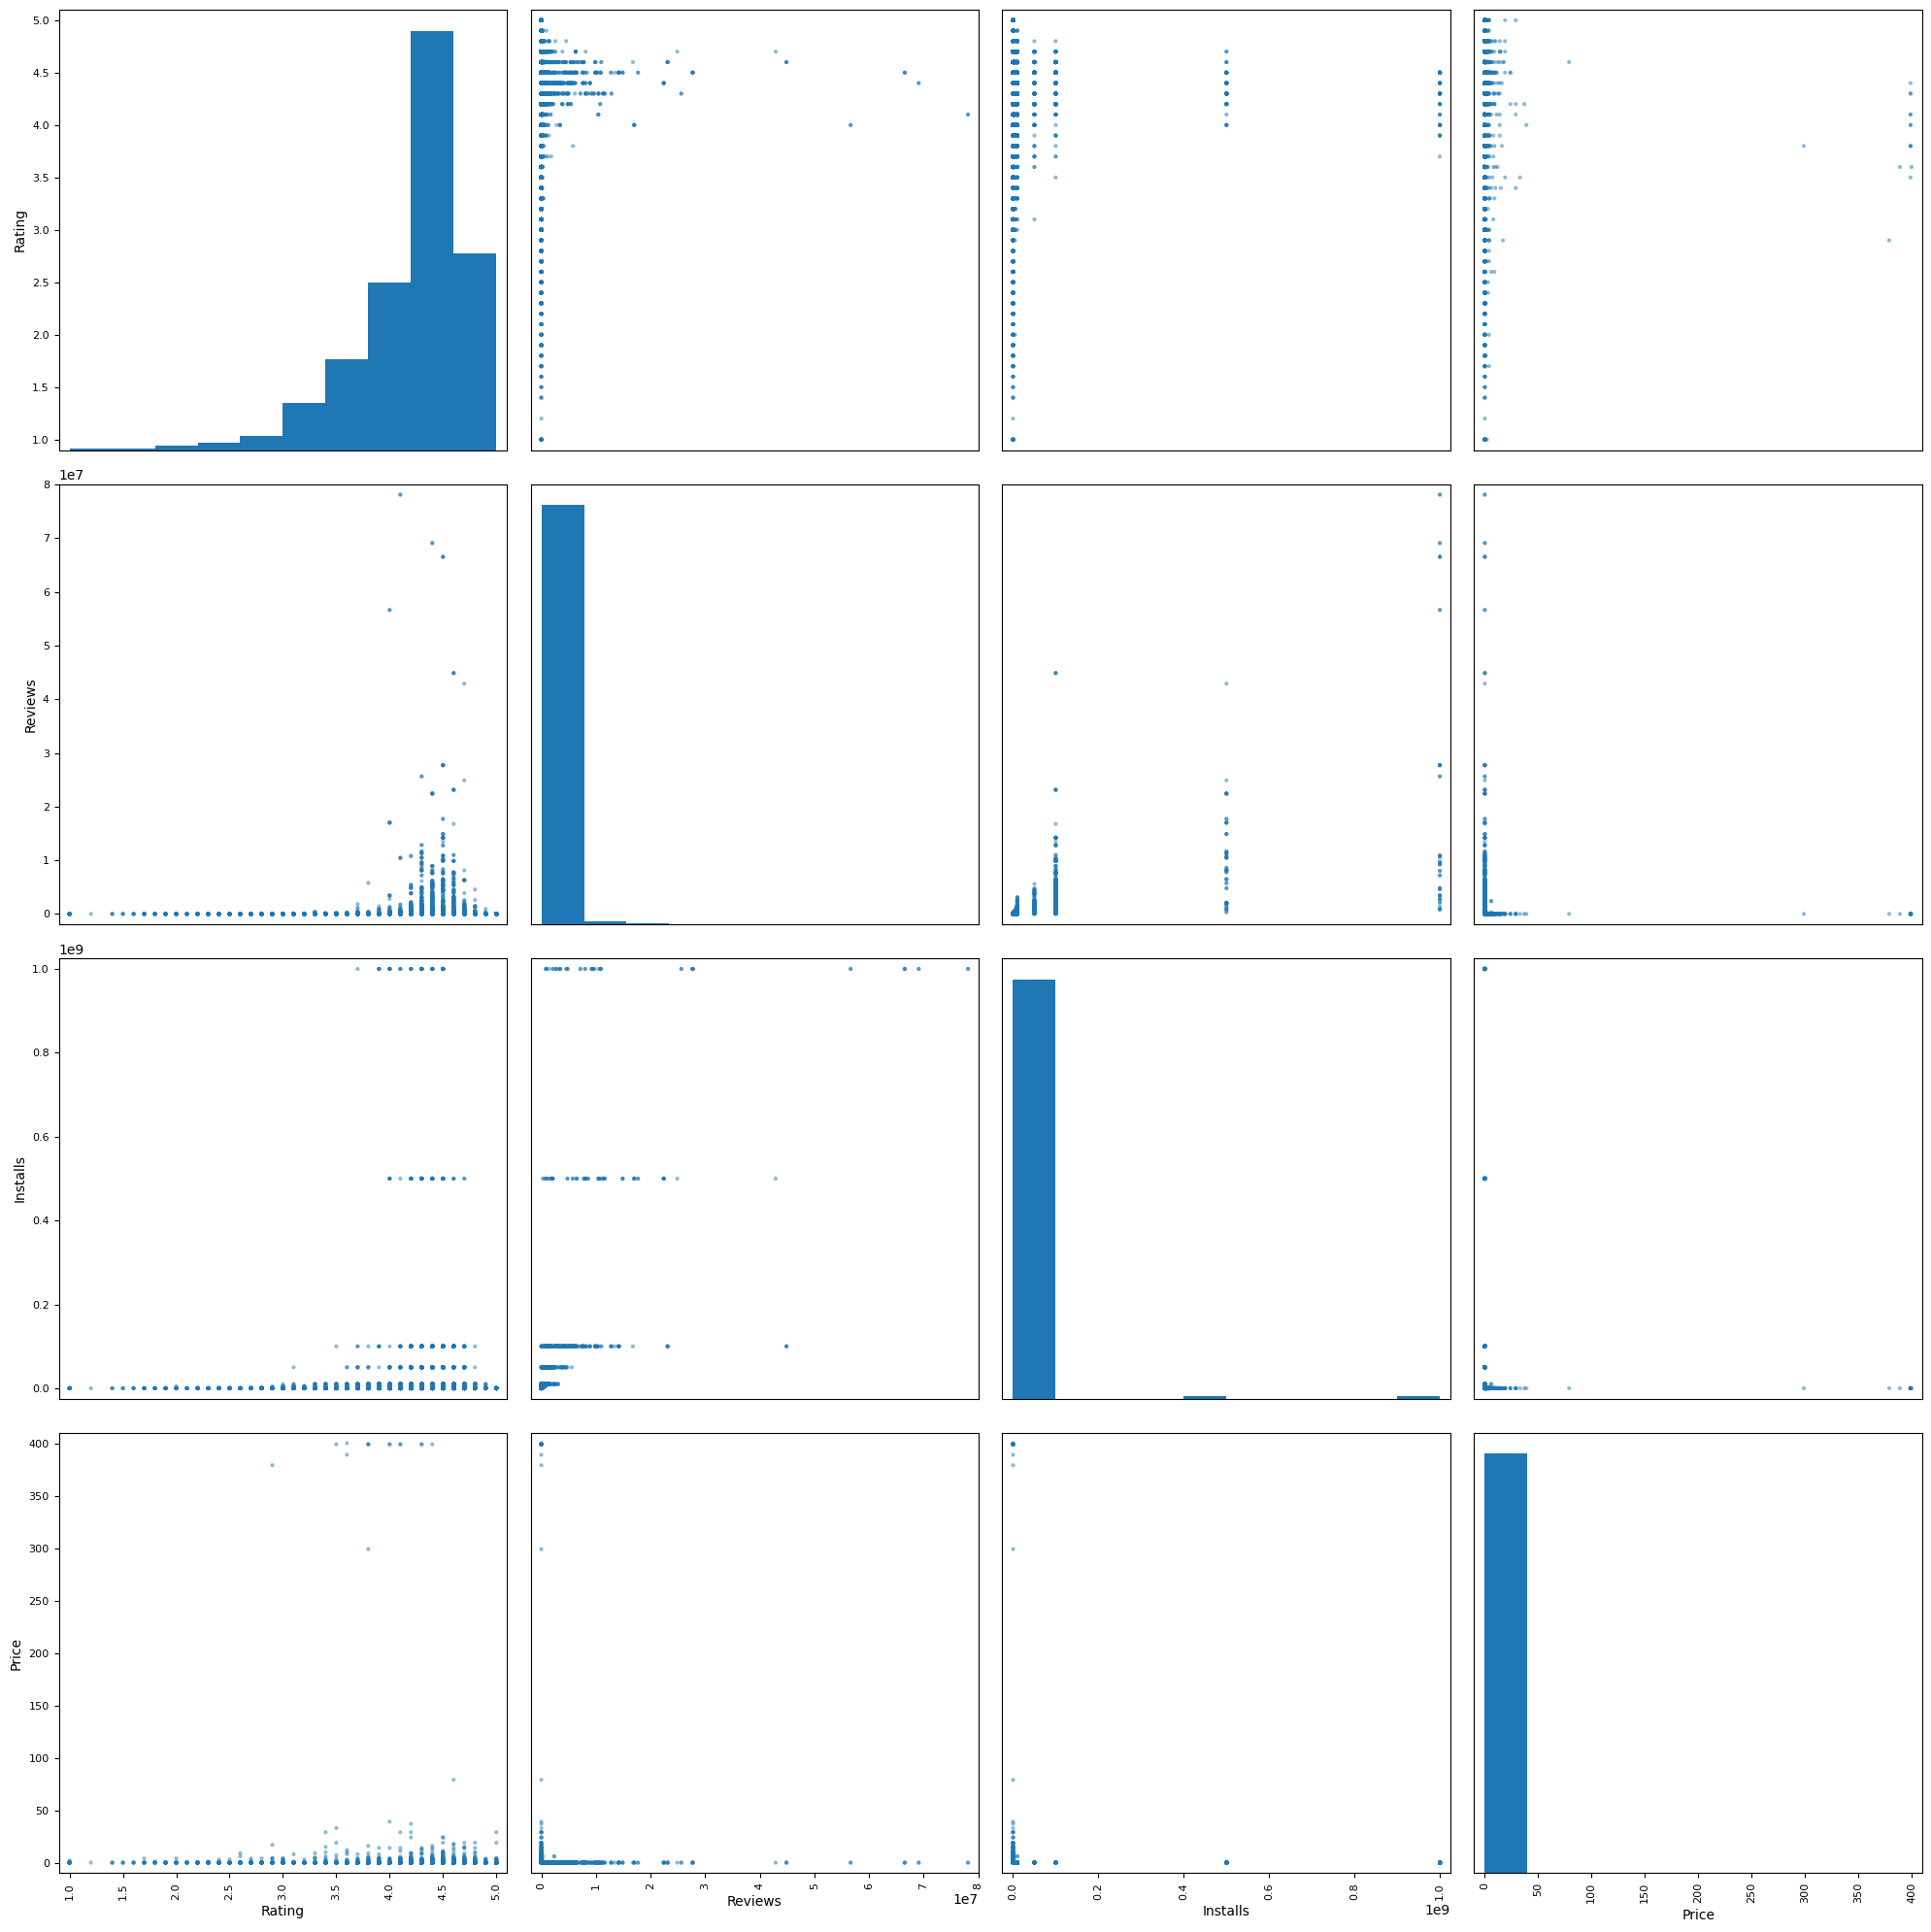

In [10]:
def print_scatter_matrix(data):
    """This function visualises the correlation matric between the variables of the data set"""
    pd.plotting.scatter_matrix(data, figsize=(20, 20))
    plt.tight_layout()

print_scatter_matrix(dataset)

### Top 10 most popular paid apps of Family category

In [11]:
# subsetting the data to family category and of paid type
family_paid_apps = dataset[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid')]
family_paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2062,Toca Mystery House,FAMILY,4.2,96,79M,5000,Paid,3,Everyone,Educational,2018-06-14,1.0.1,4.4 and up
2085,My Little Princess : Stores,FAMILY,4.3,169,60M,5000,Paid,2,Everyone,Educational,2018-05-25,1.08,4.1 and up
2086,Sago Mini Big City,FAMILY,4.2,8,44M,1000,Paid,3,Everyone,Education,2018-07-09,1.1,4.4 and up
2087,Pinkalicious Party,FAMILY,3.0,2,82M,500,Paid,2,Everyone,Educational,2018-06-25,1.5.0,4.1 and up
2150,Toca Builders,FAMILY,4.2,3328,Varies with device,100000,Paid,3,Everyone,Education,2017-07-13,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,European War 6: 1804,FAMILY,4.2,1330,96M,10000,Paid,0,Teen,Strategy,2018-07-18,1.1.0,4.4 and up
10006,XCOM®: Enemy Within,FAMILY,4.2,13752,21M,100000,Paid,9,Mature 17+,Strategy,2017-10-24,1.7.0,4.0 and up
10035,Deus Ex GO,FAMILY,4.5,9699,23M,100000,Paid,0,Teen,Puzzle,2018-07-23,2.1.111374,4.2 and up
10459,SCI-FI UI,FAMILY,4.7,15,3.9M,100,Paid,1,Everyone,Entertainment,2018-04-16,0.0.53,1.6 and up


In [12]:
# getting the top 10 most installed app by grouping the data by Apps and summing up the number of installs 
popular_apps= family_paid_apps.groupby('App')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False).head(10)
popular_apps

,App,Installs
90,Minecraft,20000000
140,Where's My Water?,1000000
76,Infinity Dungeon VIP,1000000
30,Cut the Rope GOLD,1000000
24,Card Wars - Adventure Time,1000000
16,Bloons TD 5,1000000
71,Hitman GO,500000
60,Five Nights at Freddy's 2,500000
59,Farming Simulator 16,500000
133,Toca Life: City,500000


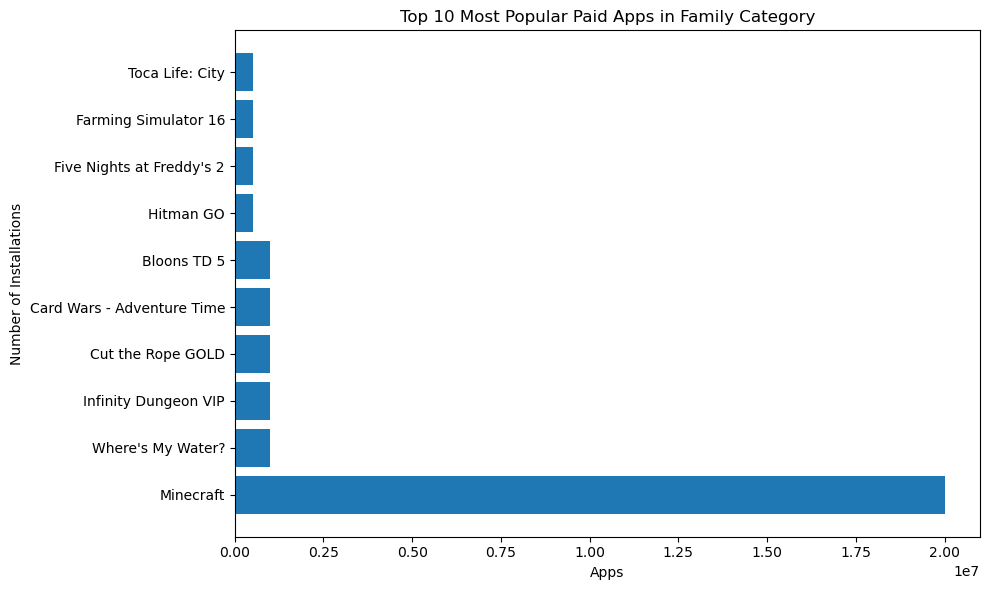

In [13]:
#visualize the top 10 most instll apps
def plot_bar_chart(x_data, y_data, x_label, y_label, title):
    """This function plots a bar chart"""
    
    plt.figure(figsize = (10, 6))
    plt.barh(x_data, y_data)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.title(title)
    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_bar_chart(popular_apps['App'], popular_apps['Installs'], 'Number of Installations', 'Apps', 'Top 10 Most Popular Paid Apps in Family Category' )

###  Most popular genres By installations from paid family

top 5 Genres
          Genres  Installs
2         Arcade  20110000
11        Puzzle   3040560
13  Role Playing   2092100
16      Strategy   1995500
5           Card   1000000


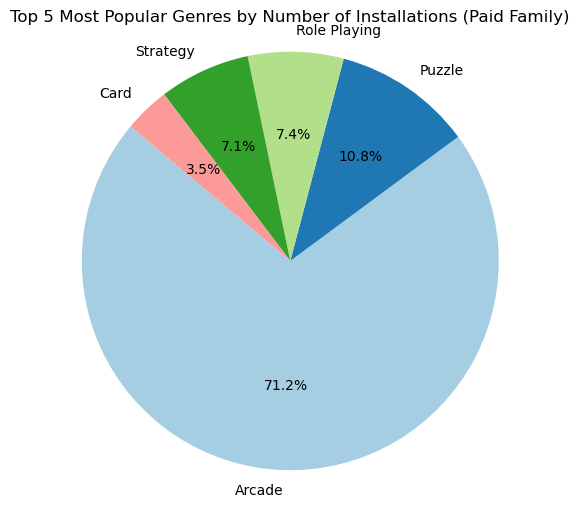

In [14]:
# Grouping the data by genres and sum up the total installations for each genre and then sort the installation in decsending order
genre_installations = family_paid_apps.groupby('Genres')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False)
# top 10 most popular genres 
top_genres = genre_installations.head()
print('top 5 Genres')
print(top_genres)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_genres['Installs'], labels=top_genres['Genres'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Most Popular Genres by Number of Installations (Paid Family)')
plt.axis('equal') 
# Show the plot
plt.show()


###  An array of the number of installation per category

In [15]:
category_installations = dataset.groupby('Category')['Installs'].sum().reset_index()
print('Installations per category')
print(category_installations)

Installations per category
               Category      Installs
0        ART_AND_DESIGN  1.242281e+08
1     AUTO_AND_VEHICLES  5.312980e+07
2                BEAUTY  2.691620e+07
3   BOOKS_AND_REFERENCE  1.916292e+09
4              BUSINESS  8.635181e+08
5                COMICS  5.603610e+07
6         COMMUNICATION  2.415224e+10
7                DATING  2.065224e+08
8             EDUCATION  5.338520e+08
9         ENTERTAINMENT  2.455660e+09
10               EVENTS  1.594941e+07
11               FAMILY  1.004108e+10
12              FINANCE  7.703124e+08
13       FOOD_AND_DRINK  2.577778e+08
14                 GAME  3.154386e+10
15   HEALTH_AND_FITNESS  1.361006e+09
16       HOUSE_AND_HOME  1.250820e+08
17   LIBRARIES_AND_DEMO  6.108300e+07
18            LIFESTYLE  5.347411e+08
19  MAPS_AND_NAVIGATION  7.242676e+08
20              MEDICAL  4.216268e+07
21   NEWS_AND_MAGAZINES  5.393111e+09
22            PARENTING  3.111611e+07
23      PERSONALIZATION  2.074342e+09
24          PHOTOGRAPHY

### Number of installation per category

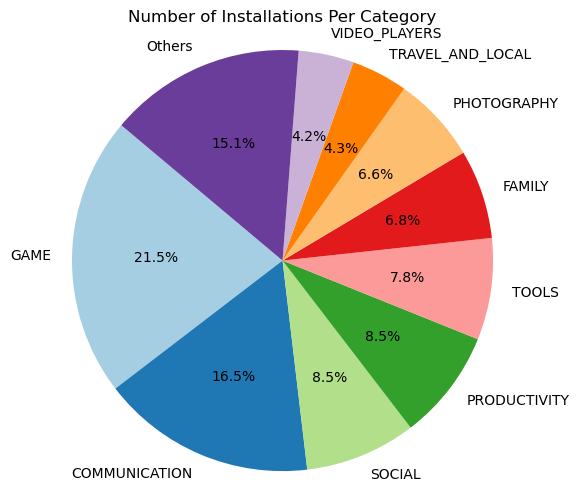

In [16]:
sorted_categories = category_installations.sort_values(by='Installs', ascending=False)

# Get the top 9 categories
top_n_categories = sorted_categories.head(9)

# Calculate the sum of installations for the rest of the categories
rest_installs = sorted_categories.iloc[9:]['Installs'].sum()

# Combine the top 9 categories and 'Others'
top_n_categories.loc[9] = ['Others', rest_installs]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_n_categories['Installs'], labels=top_n_categories['Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Number of Installations Per Category')
plt.axis('equal') 
# Show the plot
plt.show()

## The Average price per category

In [17]:
mean_price = dataset.groupby('Category')['Price'].mean().sort_values(ascending=False).reset_index()
mean_price = mean_price.rename(columns={'Price': 'Average Price'})  # Rename the column for clarity

print('Average Price per category')
print(mean_price[['Average Price', 'Category']])


Average Price per category
    Average Price             Category
0        7.656151              FINANCE
1        6.380328            LIFESTYLE
2        1.956954              MEDICAL
3        1.244030               FAMILY
4        0.306667              WEATHER
5        0.262238               SPORTS
6        0.224026      PERSONALIZATION
7        0.207407             BUSINESS
8        0.207367                TOOLS
9        0.203947          PHOTOGRAPHY
10       0.193669                 GAME
11       0.177419  MAPS_AND_NAVIGATION
12       0.167665         PRODUCTIVITY
13       0.160000            PARENTING
14       0.151220     TRAVEL_AND_LOCAL
15       0.123779        COMMUNICATION
16       0.122137   HEALTH_AND_FITNESS
17       0.119497               DATING
18       0.108527            EDUCATION
19       0.101695  BOOKS_AND_REFERENCE
20       0.066038       FOOD_AND_DRINK
21       0.054054        ENTERTAINMENT
22       0.049180       ART_AND_DESIGN
23       0.043750        VIDEO_PLAYER

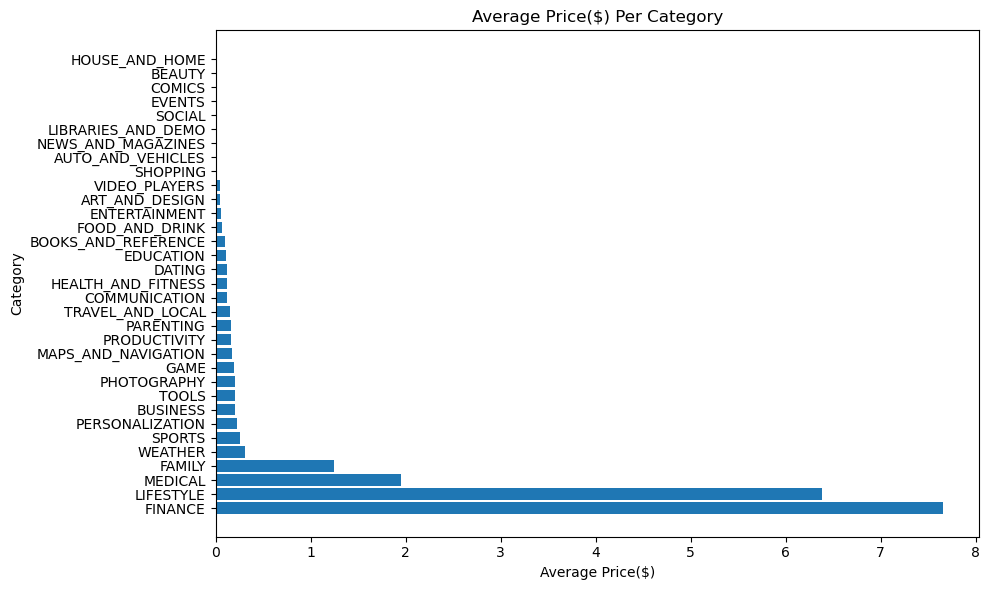

In [18]:
# Plotting a bar graph
# call the function plot_bar_chart
plot_bar_chart(mean_price['Category'], mean_price['Average Price'], 'Category', 'Average Price($)',  'Average Price($) Per Category')

## Most Expensive Apps per Category

In [19]:
sorted_df = dataset.sort_values(by=['Category', 'Price'], ascending=[True, False])

# Drop duplicates based on 'Category' to keep only the most expensive app in each category
most_expensive_apps_per_category = sorted_df.drop_duplicates(subset='Category', keep ='first')

# Display the result
print(most_expensive_apps_per_category[['Category', 'App', 'Price']])


                  Category                                                App  \
4755        ART_AND_DESIGN  X Launcher Pro: PhoneX Theme, OS11 Control Center   
4216     AUTO_AND_VEHICLES                             Ulysse Speedometer Pro   
98                  BEAUTY                         Hush - Beauty for Everyone   
5341   BOOKS_AND_REFERENCE                      Al'Quran Bahasa Indonesia PRO   
6837              BUSINESS                                 SkyTest BU/GU Lite   
297                 COMICS                         LINE WEBTOON - Free Comics   
4282         COMMUNICATION                           K-@ Mail Pro - Email App   
481                 DATING  AMBW Dating App: Asian Men Black Women Interra...   
852              EDUCATION             Fuzzy Numbers: Pre-K Number Foundation   
995          ENTERTAINMENT                                     My Talking Pet   
1004                EVENTS                                 All Events in City   
4197                FAMILY  